In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig 
from numpy.linalg import eig #same as above

In [3]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [4]:
df = pd.DataFrame(data,columns=['Maths','Bio'])

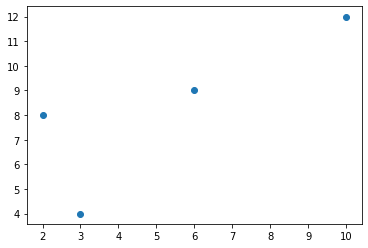

In [5]:
plt.scatter(df['Maths'],df['Bio'])

1) Standardisation of data

2) Find the covariance of the data

3) Eigen value & Eigne vector 

4) Find the Principle Component


In [6]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [7]:
print((3+2+6+10)/4)
print((4+8+9+12)/4)

5.25
8.25


In [8]:
mean_by_column = np.mean(data,axis=0)
mean_by_column

array([5.25, 8.25])

data - mean

In [9]:
scaled_data = data - mean_by_column

In [10]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [11]:
std_by_col = np.std(data,axis=0)
std_by_col

array([3.1124749 , 2.86138079])

In [12]:
scaled_data = scaled_data/std_by_col
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

### Standardisation

In [13]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [14]:
scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

A is covariance matrix = cov_mat

In [15]:
cov_mat = np.cov(scaled_data.T)
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

### Eigen value & Eigen Vector

In [16]:
eig_value,eig_vector = eig(cov_mat)
# Eigen values 
# Eigen vectors

In [17]:
eig_value

array([2.40938985, 0.25727682])

In [18]:
eig_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [20]:
eig_vector.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [21]:
from sklearn.decomposition import PCA

pca = PCA()

In [22]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [23]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PC1','PC2'])

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [24]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [25]:
sum(pca.explained_variance_ratio_)

1.0

PC1 has more information so we chose PC1 while implemnting on real data model building

PCA on every time we gonna use on numeric column

## Implementing on Glass Dataset

About Dataset

Context:

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)


Attribute Information:

Id number: 1 to 214 (removed from CSV file)

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

In [26]:
df = pd.read_csv('https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')

In [27]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
df.shape

(214, 11)

In [29]:
df = df.drop(["Id number","Type of glass"],axis=1)
df.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

In [31]:
scaled_df

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [32]:
pca1 = PCA()
pca_data = pca1.fit_transform(scaled_df)
pca_data

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [33]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [34]:
pca1.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [35]:
max(pca1.explained_variance_ratio_)

0.2790181917945647

In [36]:
min(pca1.explained_variance_ratio_)

0.00017875753590172443

In [37]:
sum(pca1.explained_variance_ratio_)

0.9999999999999998

In [38]:
np.sort(pca1.explained_variance_ratio_) # returns numpy array 

array([1.78757536e-04, 7.09477197e-03, 4.09953826e-02, 5.86261325e-02,
       1.01555805e-01, 1.28651383e-01, 1.56093777e-01, 2.27785798e-01,
       2.79018192e-01])

In [39]:
sorted(pca1.explained_variance_ratio_) 

[0.00017875753590172443,
 0.007094771974823576,
 0.04099538259055579,
 0.05862613252208679,
 0.1015558052361563,
 0.12865138291980233,
 0.15609377710940456,
 0.22778579831670406,
 0.2790181917945647]

In [40]:
#from the entire data we are extracting 95% info
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[:6])*100

95.17310878987188

In [41]:
#from the entire data we are extracting 99% info
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[:7]*100) 

99.27264704892754

In [42]:
var = pca1.explained_variance_ratio_
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [43]:
np.cumsum(var) 

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

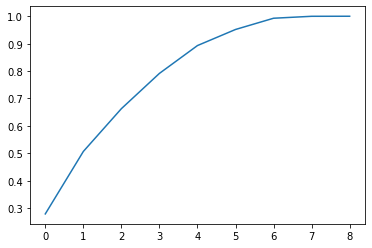

In [44]:
plt.plot(np.cumsum(var)) 
plt.show() 